# Midterm Exam
- **Author:** Deana Baron
- **Date:** 4/9/19
***
## Introduction 
For the midterm you will use the fluxnet hourly/daily/monthly/annual data  to find what variables influence the net ecosystem exchanges. These factors include both environmental factors such as air temperation, humidity, and precipitation and biophysical parameters such as land surface type, LAI and light use efficiency and other parameters. I attached two papers on this topic. We will search for answers for the three questions listed in the Baldocchi's paper 

1. how variable are carbon fluxes on a year to year basis? 
2. what are the biophysical factors that may cause interannual variability and/or temporal trends in carbon fluxes?;
3. how does the biophysical control on this carbon flux variability differ by climate and ecological spaces?

You will use both annual and monthly/daily flux data.  All the detail can be found at  https://fluxnet.fluxdata.org/data/fluxnet2015-dataset/). Here is the list of variables of each file - https://fluxnet.fluxdata.org/data/fluxnet2015-dataset/subset-data-product/ and here is the list of sites - https://fluxnet.fluxdata.org/sites/site-list-and-pages/. I downloaded 8 sites of fluxe data. These sites range from US, Canada, Europe and Australia.You are only required to choose two sites for the analysis. Of course. Here are the details of each site:

`http://sites.fluxdata.org/US-Ha1/
http://sites.fluxdata.org/US-MMS/
http://sites.fluxdata.org/US-Ton/
http://sites.fluxdata.org/FI-Hyy/
http://sites.fluxdata.org/AU-Tum/
http://sites.fluxdata.org/CA-Obs/
http://sites.fluxdata.org/US-Var/
http://sites.fluxdata.org/GF-Guy/`

The data are stored at 'http://www.geography.hunter.cuny.edu/~wenge/GTECH385-785/Data4Midterm.zip' as zip file. You can download the zip file and unzip it mannualy on your local drive. You can also use Python to access the zip file and pandas directly read the zip 
file into pandas dataframes.

## Part II - Monthly Data Analysis - 20 pts

Repeat Part I (10pts), and are the answers to Questions #1-3 changed on the monthly scale? (10pts)

In [2]:
# import necessary libraries
import os
import urllib.request
from glob import glob
import zipfile
from fnmatch import fnmatch
import pandas as pd
import matplotlib.pyplot as plt

# print statement to show success
print("Libraries successfully imported!")

# set the current working directory
os.chdir('C:\\Users\\Deana\\Downloads')

# check the current working directory after setting it
os.getcwd()

Libraries successfully imported!


'C:\\Users\\Deana\\Downloads'

In [3]:
# download the data
urllib.request.urlretrieve(
    url = "http://www.geography.hunter.cuny.edu/~wenge/GTECH385-785/Data4Midterm.zip",                  
    filename = "Data4Midterm/Data4Midterm.zip"
)

# unzip the content into a subdirectory
zip_ref = zipfile.ZipFile("Data4Midterm/Data4Midterm.zip", 'r')
zip_ref.extractall()
zip_ref.close()

print("Data successfully downloaded and extracted!")

Data successfully downloaded and extracted!


2. To read the flux data into Pandas dataframes (10pts) - 
   you only need to read the following columns

   flux = pd.read_csv(mysite,parse_dates=['TIMESTAMP'],na_values=['-9999'],
                   usecols=['TIMESTAMP','TA_F','P_F','SW_IN_F','VPD_F','NEE_VUT_REF',
                           'RECO_NT_VUT_REF','GPP_NT_VUT_REF'])
                                
   More on Pandas - https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/ 

In [4]:
# change the current working directory to the subfolder
os.chdir('C:\\Users\\Deana\\Downloads\\Data4Midterm')

# get list of monthly files
filelist = glob("*_MM_*")
print(filelist)

['FLX_AU-Tum_FLUXNET2015_SUBSET_MM_2001-2014_2-3.csv', 'FLX_CA-Obs_FLUXNET2015_SUBSET_MM_1997-2010_1-3.csv', 'FLX_FI-Hyy_FLUXNET2015_SUBSET_MM_1996-2014_1-3.csv', 'FLX_US-Ha1_FLUXNET2015_SUBSET_MM_1991-2012_1-3.csv', 'FLX_US-MMS_FLUXNET2015_SUBSET_MM_1999-2014_1-3.csv', 'FLX_US-Ton_FLUXNET2015_SUBSET_MM_2001-2014_1-3.csv']


In [5]:
# extract all the site names
sites = []
for file in filelist:
    name = file[4:10]
    sites.append(name)
print(sites)

['AU-Tum', 'CA-Obs', 'FI-Hyy', 'US-Ha1', 'US-MMS', 'US-Ton']


In [7]:
# read all monthly data into dataframes

data = []
for file in filelist:
    flux = pd.read_csv(file, na_values=['-9999'],
                       usecols=['TIMESTAMP','TA_F','P_F','SW_IN_F','VPD_F','NEE_VUT_REF',
                                'RECO_NT_VUT_REF','GPP_NT_VUT_REF'])
    flux['TIMESTAMP'] = flux['TIMESTAMP'].astype(str) + '01'
    flux['TIMESTAMP'] = pd.to_datetime(flux['TIMESTAMP'])
    data.append(flux)
print(data)

[     TIMESTAMP    TA_F  SW_IN_F   VPD_F    P_F  NEE_VUT_REF  RECO_NT_VUT_REF  \
0   2001-01-01  17.641  290.015   9.435  1.181    -2.065830         18.80700   
1   2001-02-01  16.832  267.128   7.862  2.798    -1.230790         18.26940   
2   2001-03-01  10.366  216.153   3.936  2.032    -1.037500         11.76580   
3   2001-04-01   8.557  159.399   4.282  2.007    -0.406887          9.59150   
4   2001-05-01   3.676  120.059   1.961  0.632    -0.142258          7.24131   
5   2001-06-01   2.121   88.931   1.346  5.280    -0.234454          4.61315   
6   2001-07-01   1.236   91.928   1.024  2.003    -1.946900          4.64358   
7   2001-08-01   0.321  110.577   1.219  4.032    -4.099820          1.48255   
8   2001-09-01   5.654  170.005   2.163  3.367    -1.849530          7.21245   
9   2001-10-01   4.517  191.387   1.979  5.634    -1.817540          6.33650   
10  2001-11-01   8.694  267.089   3.380  2.353    -1.244230         10.65290   
11  2001-12-01  11.437  299.689   2.228

3. Plot the time series of environmental factors (10pts)- air temperature (Ta_F), precipitation (P_F in mm/d for monthly and daily data and mm/y for annual data), vapor pressure deficity (VPD_F in hPa) and imcoming solar radiation (SW_IN_F in W m-2) (10pts)

In [8]:
def plotenvfactors(x):
    """
    function takes a list of pandas dataframes
    function does not take any other kind of variable or type
    output are plots of environmental factors in each dataframe
    """
    for df in x:
        # load the air temp on ax1
        ax1.set(xlabel="Month", ylabel="Air Temperature (degrees Celsius)");
        ax1.plot(df["TIMESTAMP"], df["TA_F"])

        # load the precipitation on ax2
        ax2.set(xlabel="Month", ylabel="Precipitation (mm/mon)");
        ax2.plot(df["TIMESTAMP"], df["P_F"])
    
        # load the vapor pressure deficiency on ax3
        ax3.set(xlabel="Month", ylabel="Vapor Pressure Deficiency (hPa)");
        ax3.plot(df["TIMESTAMP"], df["VPD_F"])
        
        # load the incoming solar radiation on ax4
        ax4.set(xlabel="Month", ylabel="Solar Radiation (W m-2)");
        ax4.plot(df["TIMESTAMP"], df["SW_IN_F"])

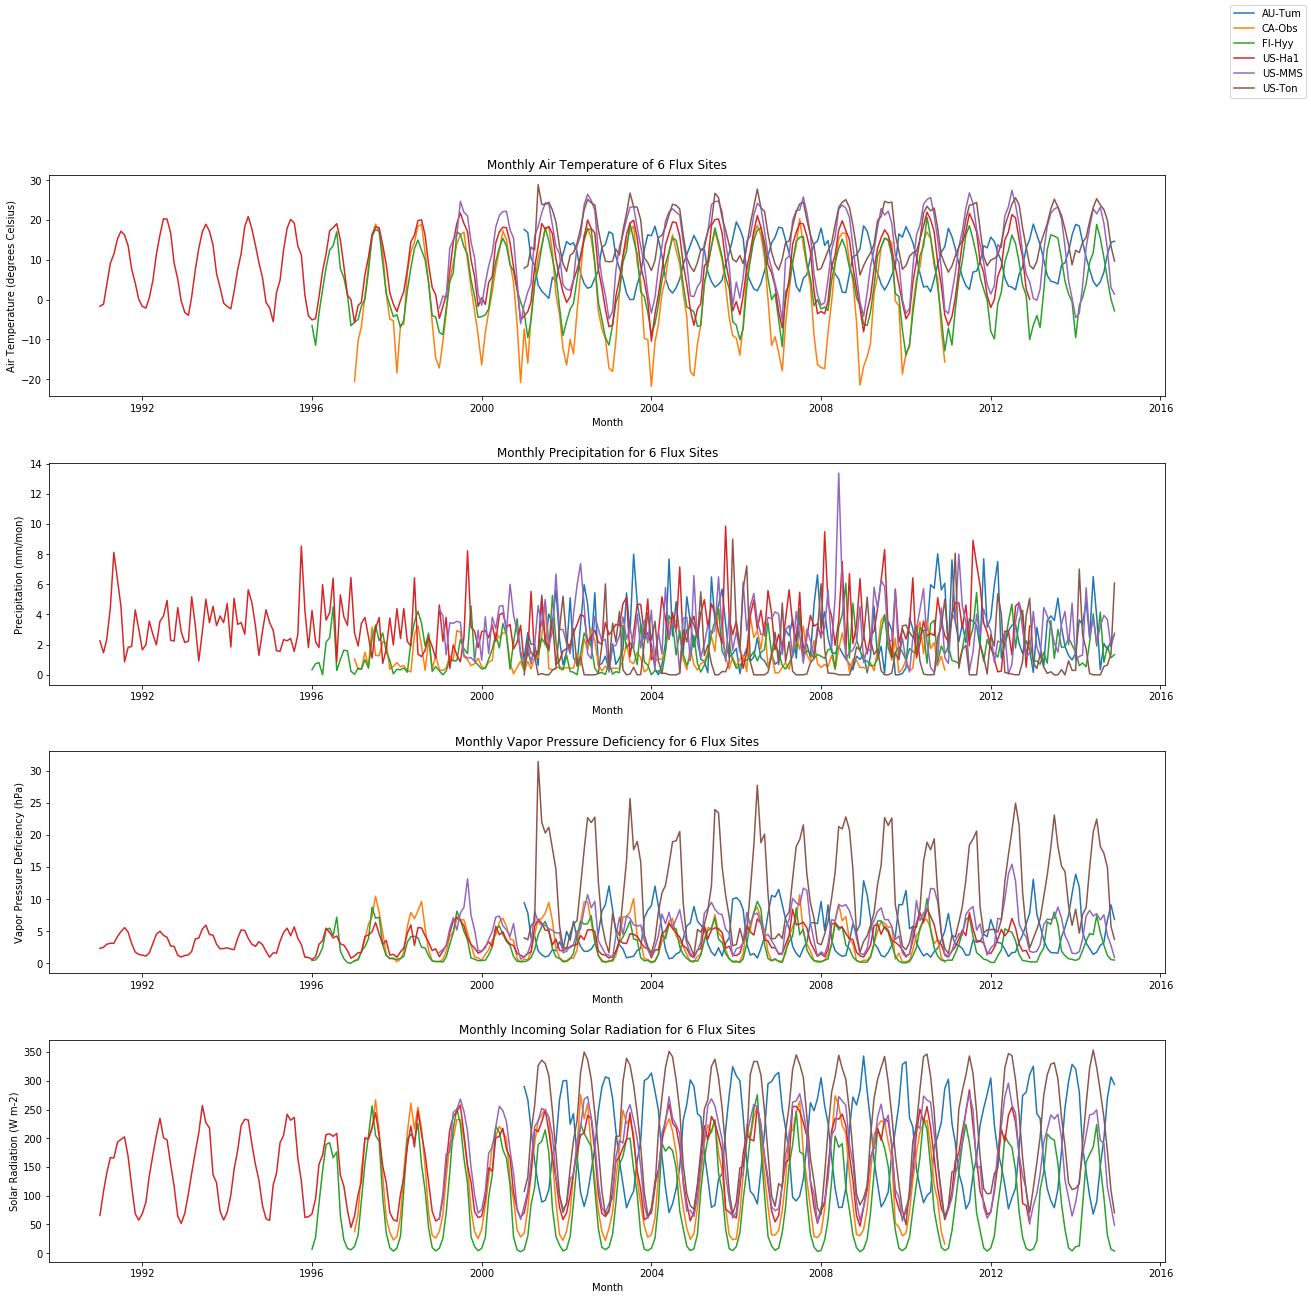

In [15]:
# set parameters for the figure for the overplotting
plt.rcParams["figure.figsize"] = (20, 20)

fig, ([ax1, ax2, ax3, ax4]) = plt.subplots(4)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
ax1.set(title="Monthly Air Temperature of 6 Flux Sites");
ax2.set(title="Monthly Precipitation for 6 Flux Sites");
ax3.set(title="Monthly Vapor Pressure Deficiency for 6 Flux Sites");
ax4.set(title="Monthly Incoming Solar Radiation for 6 Flux Sites");

# run function on data list
plotenvfactors(data)

# set the legend for the figure
fig.legend((sites));

4. plot the time series of ecosyten variables (10pts)- net ecosystem exchange (NEE_VUT_REF), 
     respiration (RECO_NT_VUT_REF) and gross primariy production (GPP_NT_VUT_REF). 
     The unit for all three is  gC m-2 d-1 for monthly and daily data, gC m-2 y-1 for annual data

In [10]:
# modify the plotenvfactors() function to work for the NEE, RECO, and GPP
def plotecofactors(x):
    """
    function takes a list of pandas dataframes
    function does not take any other kind of variable or type
    output are plots of ecosystem factors in each dataframe
    """
    for df in x:
        # load the NEE on ax1
        ax1.set(xlabel="Month", ylabel="Net Ecosystem Exchange (gC m-2 d-1)");
        ax1.plot(df["TIMESTAMP"], df["NEE_VUT_REF"])

        # load the RECO on ax2
        ax2.set(xlabel="Month", ylabel="Respiration (gC m-2 d-1)");
        ax2.plot(df["TIMESTAMP"], df["RECO_NT_VUT_REF"])
    
        # load the GPP on ax3
        ax3.set(xlabel="Month", ylabel="Gross Primary Production (gC m-2 d-1)");
        ax3.plot(df["TIMESTAMP"], df["GPP_NT_VUT_REF"])

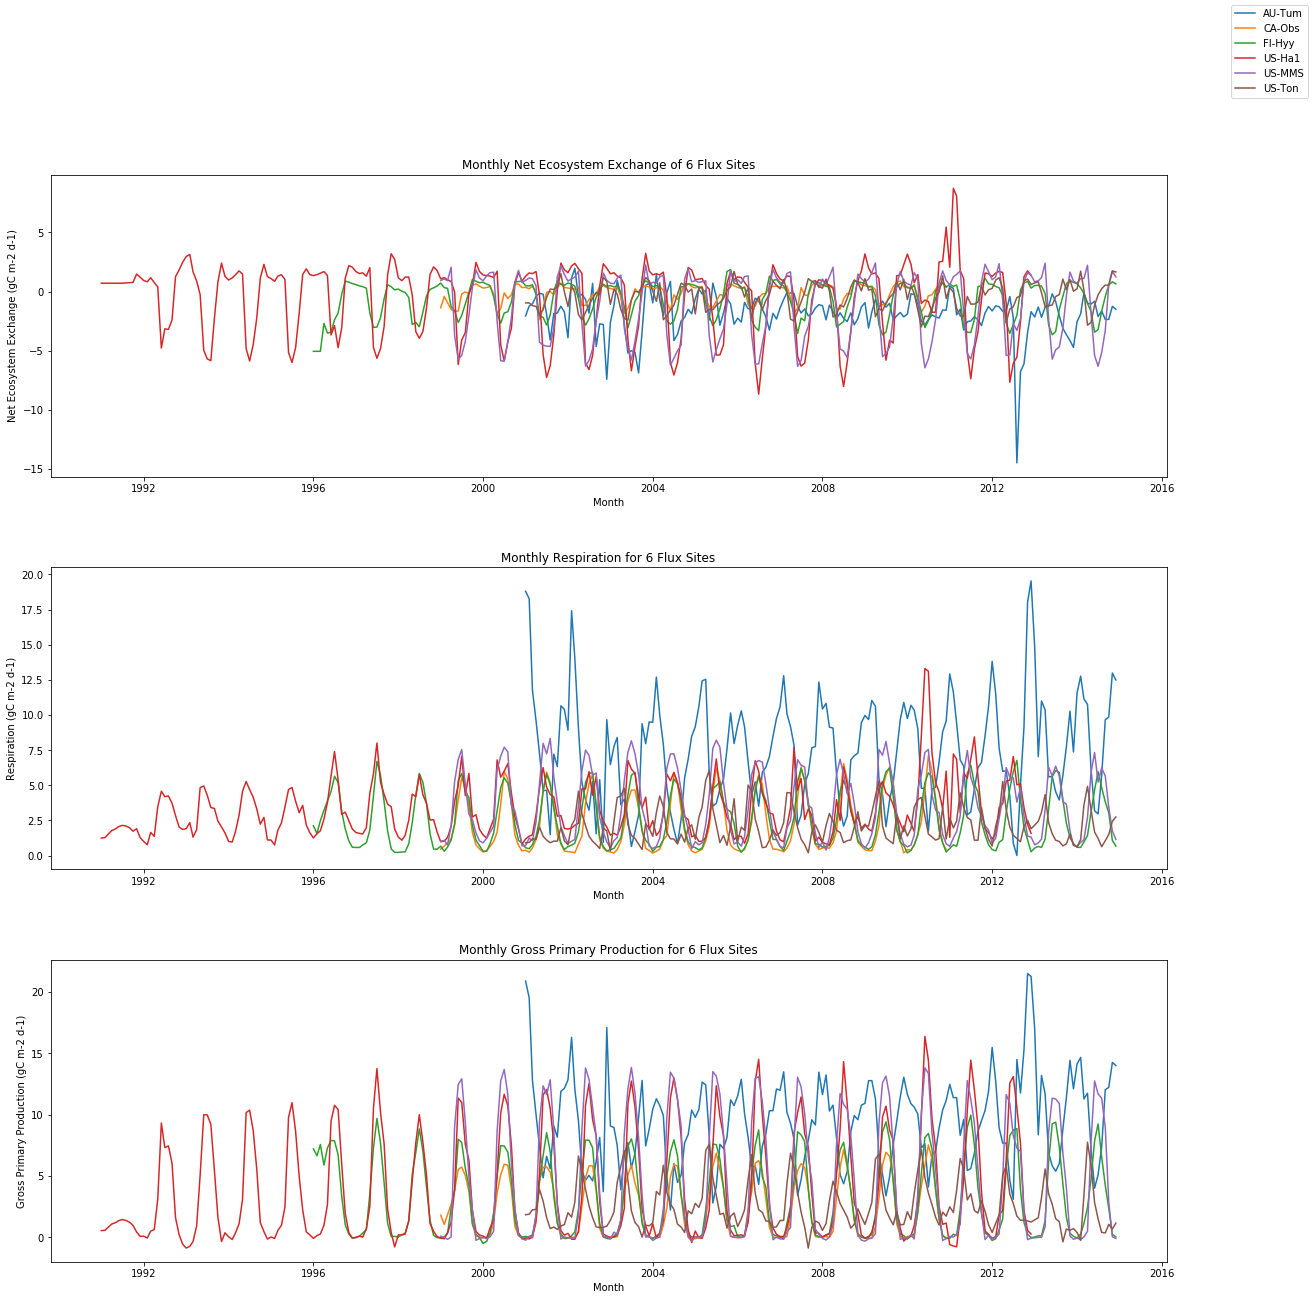

In [14]:
# set parameters for the figure for the overplotting
plt.rcParams["figure.figsize"] = (20, 20)

fig, (ax1, ax2, ax3) = plt.subplots(3)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
ax1.set(title="Monthly Net Ecosystem Exchange of 6 Flux Sites");
ax2.set(title="Monthly Respiration for 6 Flux Sites");
ax3.set(title="Monthly Gross Primary Production for 6 Flux Sites");

# run function on data list
plotecofactors(data)

# set the legend for the figure
fig.legend((sites));

5. plot the scatter plot between Gross primariy production with environmental factors - air temperature, precipitation, vapor pressure deficity and imcoming solar radiation (10pts)

More on Matplotlib - https://matplotlib.org/tutorials/index.html
https://realpython.com/python-matplotlib-guide/?utm_campaign=Data%2BElixir&utm_medium=email&utm_source=Data_Elixir_172

In [12]:
# write a function for the scatter plot
def fluxscatter(x):
    """
    function takes a list of pandas dataframes
    function does not take any other kind of variable or type
    output are scatter plots of GPP vs env factors
    """
    for df in x:
        # GPP vs air temp
        ax1.set(xlabel="Air Temperature (degrees Celsius)", ylabel="Gross Primary Production (gC m-2 d-1)")
        ax1.scatter(df["TA_F"], df["GPP_NT_VUT_REF"])
        
        # GPP vs precipitation
        ax2.set(xlabel="Precipitation (mm/mon)", ylabel="Gross Primary Production (gC m-2 d-1)")
        ax2.scatter(df["P_F"], df["GPP_NT_VUT_REF"])
        
        # GPP vs vapor pressure deficiency
        ax3.set(xlabel="Vapor Pressure Deficiency (hPa)", ylabel="Gross Primary Production (gC m-2 d-1)")
        ax3.scatter(df["VPD_F"], df["GPP_NT_VUT_REF"])
        
        # GPP vs incoming solar radiation
        ax4.set(xlabel="Solar Radiation (W m-2)", ylabel="Gross Primary Production (gC m-2 d-1)")
        ax4.scatter(df["SW_IN_F"], df["GPP_NT_VUT_REF"])

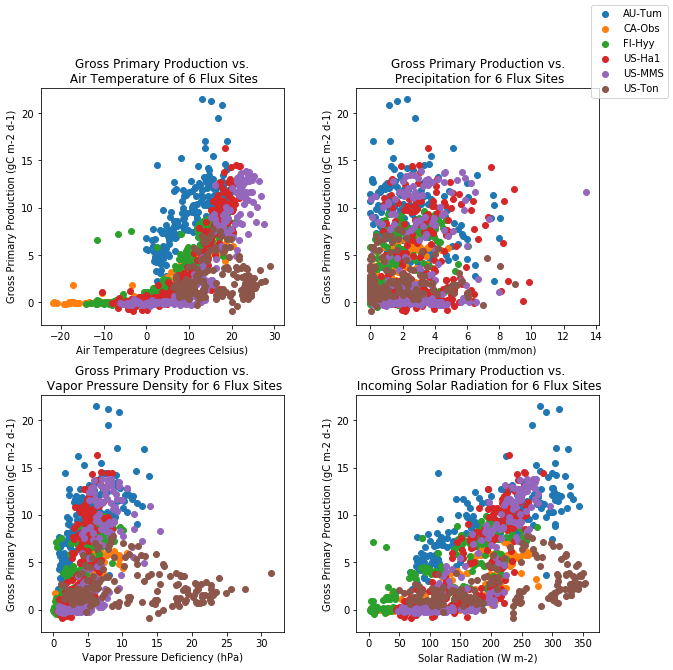

In [13]:
# set parameters for the figure for the overplotting
plt.rcParams["figure.figsize"] = (10, 10)

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
ax1.set(title="Gross Primary Production vs.\n Air Temperature of 6 Flux Sites");
ax2.set(title="Gross Primary Production vs.\n Precipitation for 6 Flux Sites");
ax3.set(title="Gross Primary Production vs.\n Vapor Pressure Density for 6 Flux Sites");
ax4.set(title="Gross Primary Production vs.\n Incoming Solar Radiation for 6 Flux Sites");

# run function on data list
fluxscatter(data)

# set the legend for the figure
fig.legend((sites));

Are the answers to Questions #1-3 changed on the monthly scale? (10pts)
- Question 1 (5pts) - Are there any trend and variability of the environmental factors? Do you observe any difference between different sites? 

- Question 2 (5pts)- Are there any trend and variability of the ecosytem variables? Do you observe any  (10pts)  between different sites? 

- Question 3 (5pts)- Are the GPP associated with any of the environmental factors?
***
The answers for Questions 1 -3 are slightly different once we start looking at the monthly data.

1. At the monthly level, much of the variability that we see is due to seasonal variation since we're at a higher resolution of data, except for precipitation, which is mostly just noise. The site in Australia has a reversed seasonal pattern because it's located in the Southern Hemisphere while the rest of the sites are located in the Northern Hemisphere. We can see small trends, like that Tonzi Ranch has the largest seasonal range in vapor pressure density, but otherwise the sites are almost overlapping in their values.

2. At the monthly level, the ecosystem variables are quite similar to the environmental factors. The differences between values through time appear to be seasonal variability, and again even overlap. Differences in values here are directly due to particular site location and type of vegetation present. The Australian site appears to have the largest range in seasonal variability in Respiration and Gross Primary Production. It is also reverse to the other sites since it is in the Southern Hemisphere.

3. Contrary to the other graphs, moving from monthly to yearly data in for the scatter plot actually obscures the trend present due to other confounding variables. Precipitation still does not appear to have a correlation to GPP. The other factors definitely do, but it is harder to discern. They all have a peak value that corresponds to the highest GPP, and then start to decrease. This is most clear for vapor pressure deficiency. Temperature doesn't appear to have a drop off. Solar radiation is considerably more noisy.